# Demonstration of principal curvature determination from a real image

In this notebook, I will use the `curvature` module of my `ridge_trace` package to calculate the principal curvature of an HST optical emission line image of a proplyd bow shock. 

## Imports

In [1]:
from pathlib import Path
import numpy as np
from astropy.io import fits
from astropy.convolution import convolve_fft
from astropy.convolution.kernels import Gaussian2DKernel
from ridge_trace.curvature import ImageCurvature
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("talk")

## Load the image from a FITS file

Find all the FITS images in the data folder

In [2]:
datapath = Path.cwd().parent / "data"
fitsfiles = list(datapath.glob("*.fits"))
fitsfiles

[PosixPath('/Users/will/Dropbox/ridge-trace/data/w000-400-Bally_09-extract.fits'),
 PosixPath('/Users/will/Dropbox/ridge-trace/data/w069-601-Bally_01-extract.fits')]

Open one of the images and zoom in on the interesting portion

In [3]:
hdu = fits.open(fitsfiles[0])["SCI"]
x1, x2 = 200, 500
y1, y2 = 600, 900
xslice, yslice = slice(x1, x2), slice(y1, y2)
data = hdu.data[yslice, xslice]

## Smooth the image

The curvature class can do the smoothing for us, but we want access to the smoothed image for plotting contours, so we will do it ourselves first. 

In [4]:
sigma = 3.0
sdata = convolve_fft(hdu.data, Gaussian2DKernel(sigma))[yslice, xslice]

## Display the image

Use percentiles to choose sensible data limits for the image

In [5]:
vmin, vmax = np.percentile(data, [1, 99])

And plot the image

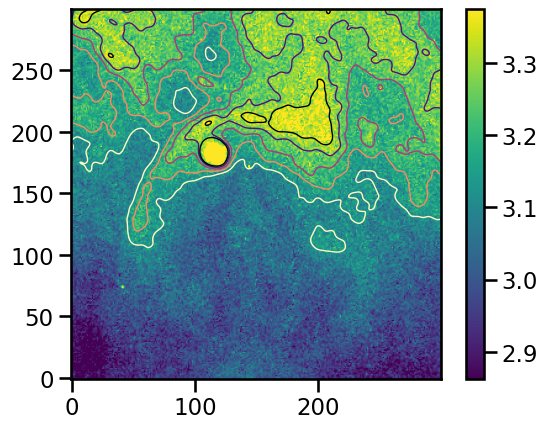

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(data, origin='lower', vmin=vmin, vmax=vmax)
levels = 3.12 + np.arange(5) * 0.05
ax.contour(sdata, levels=levels, cmap="magma_r", linewidths=1)
fig.colorbar(im, ax=ax)
...;

## Find the curvatures


In [61]:
ic = ImageCurvature(hdu.data, smooth=3, sharp=None, max=3.4, bbox=[x1, y1, x2, y2])

In [62]:
ic.image.shape

(300, 300)

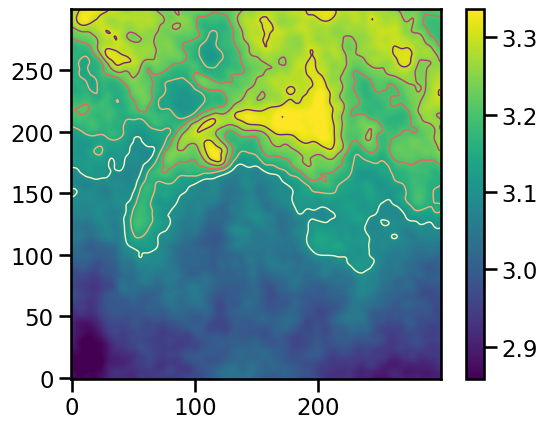

In [70]:
fig, ax = plt.subplots()
vmin, vmax = np.percentile(ic.image, [0.5, 99.5])
im = ax.imshow(ic.image, origin='lower', vmin=vmin, vmax=vmax)
levels = 3.1 + np.arange(7) * 0.05
ax.contour(ic.image, levels=levels, cmap="magma_r", linewidths=1)
fig.colorbar(im, ax=ax)

In [16]:
ic.kappa1

array([[ 0.00037267,  0.00049514,  0.00066079, ...,  0.00022399,
         0.00039322,  0.00052731],
       [-0.00033839, -0.0004781 , -0.00067113, ...,  0.00047126,
         0.00055956,  0.00070306],
       [-0.00070439, -0.00080571, -0.0008786 , ...,  0.00095375,
         0.00099682,  0.00110624],
       ...,
       [ 0.00166547,  0.0018636 ,  0.00188496, ..., -0.00057584,
        -0.00068771, -0.00075208],
       [ 0.00158053,  0.00183269,  0.0019498 , ..., -0.00052125,
        -0.00064106, -0.00067477],
       [ 0.00147357,  0.00176428,  0.00195811, ..., -0.00049117,
        -0.00058404, -0.00058991]])

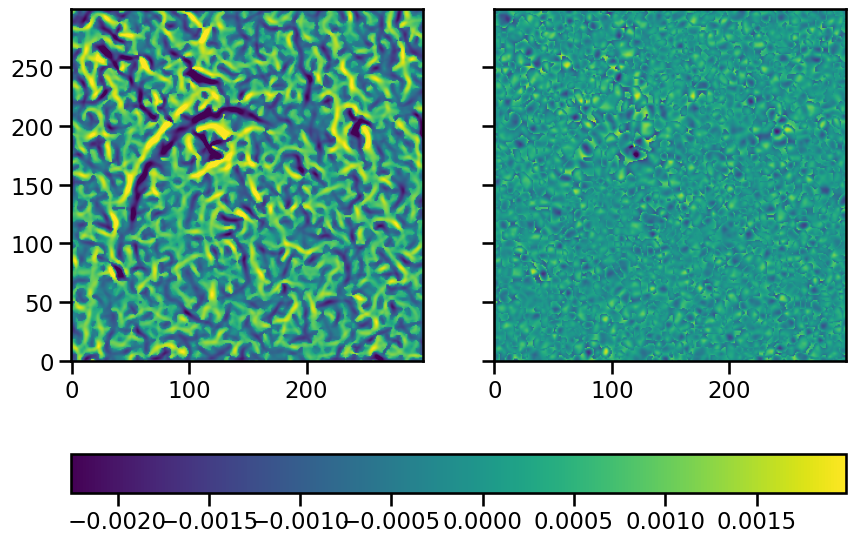

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 8))
vmin, vmax = np.percentile(ic.kappa1, [1, 99])
im1 = ax1.imshow(ic.kappa1, origin='lower', vmin=vmin, vmax=vmax)
im2 = ax2.imshow(ic.kappa2, origin='lower', vmin=vmin, vmax=vmax)
fig.colorbar(im1, ax=(ax1, ax2), orientation="horizontal")
for ax in ax1, ax2:
    ax.contour(ic.image, levels=levels, cmap="magma_r", linewidths=1)
...;

In [88]:
ic2 = ImageCurvature(hdu.data, smooth=5, sharp=180, max=3.4, bbox=[x1, y1, x2, y2])


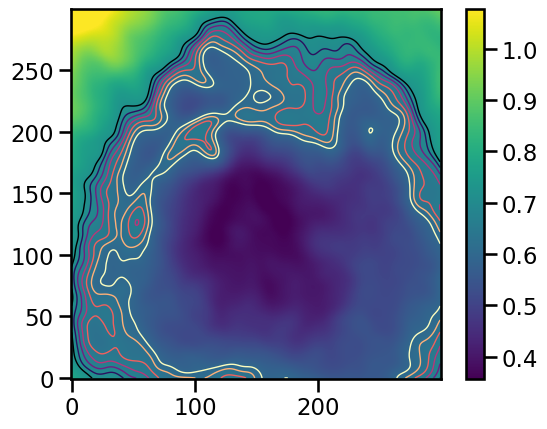

In [89]:
fig, ax = plt.subplots()
vmin, vmax = np.percentile(ic2.image, [0.5, 99.5])
im = ax.imshow(ic2.image, origin='lower', vmin=vmin, vmax=vmax)
levels = 0.6 + np.arange(7) * 0.02

ax.contour(ic2.image, levels=levels, cmap="magma_r", linewidths=1)
fig.colorbar(im, ax=ax)

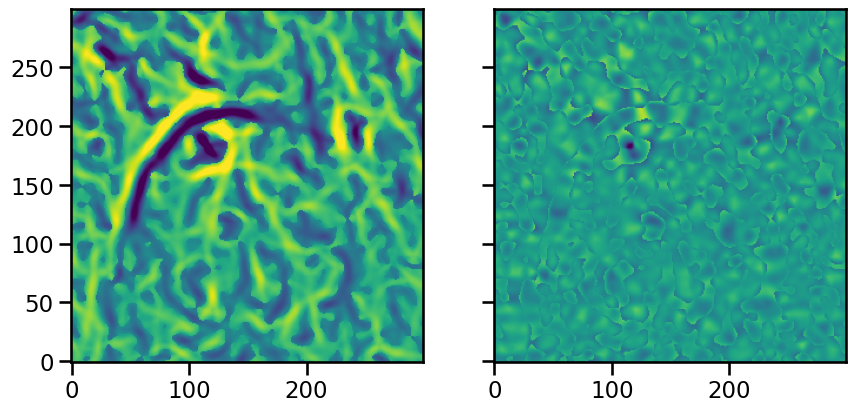

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
vmin, vmax = np.percentile(ic2.kappa1, [1, 99])
im1 = ax1.imshow(ic2.kappa1, origin='lower', vmin=vmin, vmax=vmax)
im2 = ax2.imshow(ic2.kappa2, origin='lower', vmin=vmin, vmax=vmax)
#for ax in ax1, ax2:
#    ax.contour(ic2.image, levels=levels, cmap="magma_r", linewidths=1)

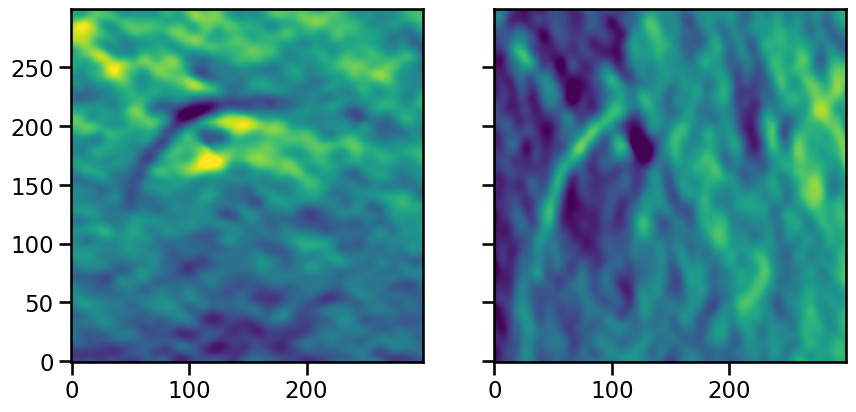

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
vmin, vmax = np.percentile(ic2.grad_x + ic2.grad_y, [1, 99])
im1 = ax1.imshow(ic2.grad_x, origin='lower', vmin=vmin, vmax=vmax)
im2 = ax2.imshow(ic2.grad_y, origin='lower', vmin=vmin, vmax=vmax)

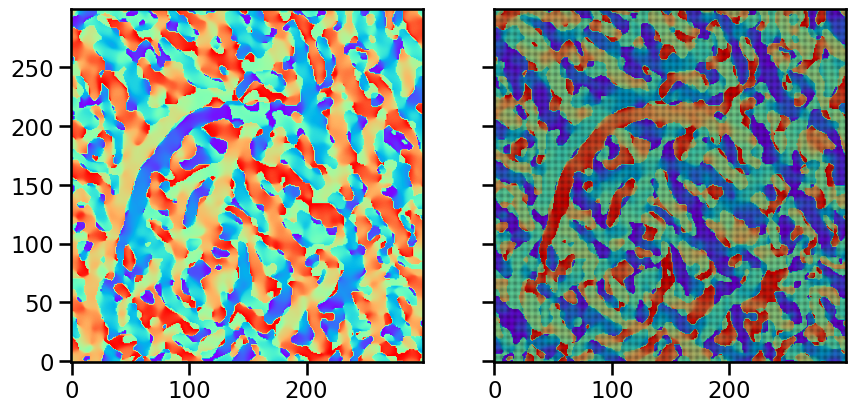

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
vmin, vmax = np.percentile(ic2.theta1, [1, 99])
im1 = ax1.imshow(ic2.theta1, origin='lower', vmin=vmin, vmax=vmax, cmap="rainbow")
im2 = ax2.imshow(ic2.theta2, origin='lower', vmin=vmin, vmax=vmax, cmap="rainbow")
#ax2.quiver(np.ones_like(ic2.image), np.ones_like(ic2.image), angles=ic2.theta2)